В файле Worldbank.xlsx содержаться данные Всемирного банка по разным статьям экспорта по странам за 2018 год.

0) Для начала импортируем нужные нам библиотеки и откроем наш файл

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

In [5]:
df = pd.read_excel('Worldbank.xlsx') ## мы записали датасет в переменную df и рассмотрели несколько строк из него
df.head()  # глянем на пару записей из таблицы

,Year,CountryName,CountryCode,Agriculturalrawmaterialsexpor,ArmsexportsSIPRItrendindica,Commercialserviceexportscurr,Communicationscomputeretc,Exportsofgoodsandservices,Exportsofgoodsandservicesa,ExportsofgoodsandservicesB,...,Fuelexportsofmerchandisee,Hightechnologyexportsofma,Hightechnologyexportscurrent,TaxesonexportscurrentLCU,Transportservicesofservice,Travelservicesofcommercial,Travelservicesofserviceex,high_income,income,development
0,2018,Andorra,AND,1.551347,NaN,NaN,NaN,NaN,NaN,NaN,...,0.013955,28.460560,3.391348e+07,NaN,NaN,NaN,NaN,1,high income,developed
1,2018,Antigua and Barbuda,ATG,0.000000,NaN,1.112068e+09,0.187833,NaN,NaN,1.151693e+09,...,0.000000,0.209768,3.911000e+03,NaN,12.063282,79.197620,79.085789,1,high income,developing
2,2018,Aruba,ABW,0.075850,NaN,NaN,NaN,NaN,NaN,NaN,...,0.122011,8.338925,2.562959e+06,NaN,NaN,NaN,NaN,1,high income,developing
3,2018,Australia,AUS,2.293782,38000000.0,6.856142e+10,4.851458,21.804658,4.101769,3.272645e+11,...,24.448891,16.708318,5.274080e+09,NaN,8.130395,65.777866,64.968547,1,high income,developed
4,2018,Austria,AUT,1.613744,5000000.0,7.413284e+10,8.824110,55.755855,5.884652,2.538067e+11,...,2.047786,11.638526,1.668750e+10,NaN,23.070122,31.340080,31.080313,1,high income,developed


In [6]:
df.columns ## посмотрим на все колонки нашего датасета

Index(['Year', 'CountryName', 'CountryCode', 'Agriculturalrawmaterialsexpor',
       'ArmsexportsSIPRItrendindica', 'Commercialserviceexportscurr',
       'Communicationscomputeretc', 'Exportsofgoodsandservices',
       'Exportsofgoodsandservicesa', 'ExportsofgoodsandservicesB',
       'Exportsofgoodsandservicesc', 'Foodexportsofmerchandisee',
       'GoodsexportsBoPcurrentUS', 'Fuelexportsofmerchandisee',
       'Hightechnologyexportsofma', 'Hightechnologyexportscurrent',
       'TaxesonexportscurrentLCU', 'Transportservicesofservice',
       'Travelservicesofcommercial', 'Travelservicesofserviceex',
       'high_income', 'income', 'development'],
      dtype='object')

###  <center> **Задание 1. Проверка отличия распределения от «нормального»** </center>
* Проанализируйте распределение значений метрических переменных. 
* Проведите тест для проверки того отличается ли распределение значений переменных от нормального распределения. 
* Сформулируйте гипотезы и выводы по результатам анализа. 
* Постройте гистограммы распределения с наложенной кривой нормального распределения. 


In [7]:

# Мы рассмотрели столбец Fuelexportsofmerchandisee (Fuel exports (% of merchandise exports)). Проврим отличие его распределения от нормального
data = df['Fuelexportsofmerchandisee'].dropna() # уберем все пропущенные значения

# Выведем основные характеристики:
mean_value = np.mean(data)
median_value = np.median(data)
std_deviation = np.std(data)

print(f'Среднее значение: {mean_value}')
print(f'Медиана: {median_value}')
print(f'Стандартное отклонение: {std_deviation}')

Среднее значение: 16.11322897370712
Медиана: 4.642973814835992
Стандартное отклонение: 24.25612860609317


Статистика теста: 0.68083655834198
p-значение: 6.252172529832645e-15
Распределение не похоже на нормальное (отвергаем H0)


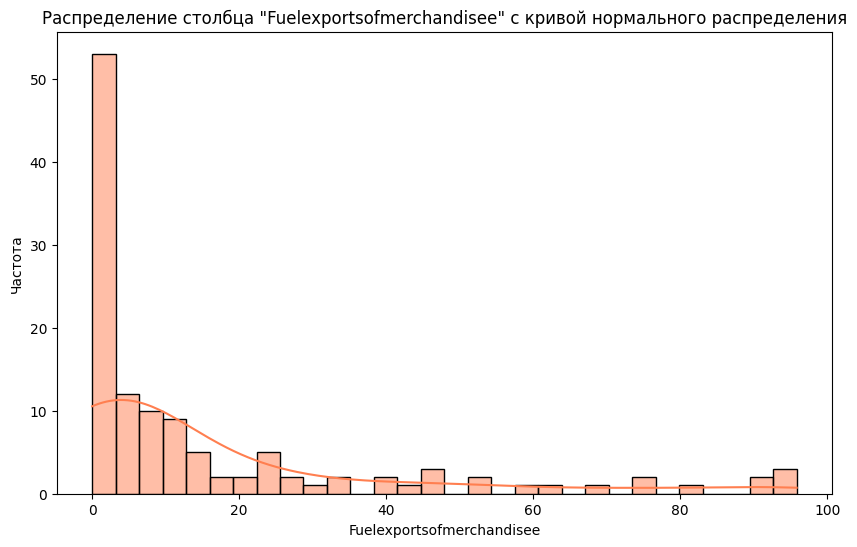

In [8]:
# Теперь мы проведем проверку на нормальность с использованием теста Шапиро-Уилка
statistic, p_value = stats.shapiro(data)
print(f'Статистика теста: {statistic}')
print(f'p-значение: {p_value}')


# Сама проверка гипотезы о нормальности (не захотели вручную смотреть поэтому написали через if)
if p_value > 0.05: # уровень значимости для проверки гипотезы равен 0.05
    print('Распределение похоже на нормальное (не отвергаем H0)')
else:
    print('Распределение не похоже на нормальное (отвергаем H0)')


# Построение гистограммы с наложенной кривой нормального распределения
plt.figure(figsize=(10, 6))
sns.histplot(data, kde=True, color='coral', bins=30)
plt.title(f'Распределение столбца "Fuelexportsofmerchandisee" с кривой нормального распределения')
plt.xlabel('Fuelexportsofmerchandisee')
plt.ylabel('Частота')
plt.show()

Исходя из результатов теста Шапиро-Уилка:

Статистика теста (0.6808) близка к 1.
P-значение (6.25e-15) очень маленькое.
На основе этих результатов можно сделать следующие выводы:

1) В данном задании, когда мы провели тест Шапиро-Уилка для анализа распределения переменной 'Fuelexportsofmerchandisee', у нас есть две гипотезы:
        
        * Нулевая гипотеза (H0): Распределение данных переменной 'Fuelexportsofmerchandisee' является нормальным.
        * Альтернативная гипотеза (H1): Распределение данных переменной 'Fuelexportsofmerchandisee' не является нормальным.

2) Результаты теста позволяют нам принять одну из этих гипотез. В данном случае, так как p-значение меньше уровня значимости (обычно 0.05), нулевая гипотеза отвергается в пользу альтернативной гипотезы. Это означает, что распределение данных 'Fuelexportsofmerchandisee' не является нормальным.

Вывод: Распределение данных по колонке 'Fuelexportsofmerchandisee' отличается от нормального распределения. Это означает, что данные, скорее всего, имеют ненормальную форму распределения, которая может быть скошенной или иметь другую форму.



### <center> **Задание 2. Тест Хи-квадрат** </center>
* Проведите тест Хи-квадрат со всеми возможными парами переменных, для которых он применим. Можно использовать как исходные переменные, так и перекодировать их. 
* Постройте для выбранных пар переменных таблицы сопряженности и прокомментируйте их. 
* Сформулируйте гипотезы. Интерпретируйте результаты анализа. Обоснуйте свои выводы.


Тест Хи-квадрат (χ²) - это статистический тест, который используется для анализа связи между двумя категориальными переменными. Для выполнения этого теста мы выполнили следующие шаги:

1) Выбрать все категориальные переменные для анализа

2) Построить таблицу сопряженности (кросс-таблицу) для выбранных переменных. Таблица сопряженности представляет собой матрицу, в которой значения пересекаются между категориями обеих переменных.

3) Сформулировать нулевую и альтернативную гипотезы:
Нулевая гипотеза (H0): Нет статистической связи между двумя переменными.
Альтернативная гипотеза (H1): Существует статистическая связь между двумя переменными.

4) Вычислить ожидаемые частоты (ожидаемые значения) для каждой ячейки таблицы сопряженности, если нулевая гипотеза верна.

5) Провести сам тест Хи-квадрат, который сравнивает фактические частоты с ожидаемыми частотами и вычисляет статистику χ².

6) Определить степени свободы теста (количество категорий - 1 для каждой переменной) и уровень значимости (обычно 0.05).

7) Сравнить рассчитанное значение χ² с критическим значением из таблицы χ² для заданного уровня значимости и степеней свободы. Если χ² больше критического значения, то нулевая гипотеза отвергается.

8) Интерпретировать результаты теста. Если нулевая гипотеза отвергается, это указывает на наличие статистически значимой связи между переменными.

9) Прокомментировать таблицу сопряженности, выявив какие категории переменных вносят наибольший вклад в статистическую связь (если такая связь есть).

10) Сделать выводы о наличии или отсутствии связи между выбранными переменными и сформулировать практические выводы.

In [9]:
from scipy.stats import chi2_contingency

# Для начала я получила все категориальные переменные из нашего датасета
k = df.select_dtypes(include=['object']).columns
k

Index(['CountryName', 'CountryCode', 'income', 'development'], dtype='object')

In [10]:
# Проход по всем парам переменных и выполнение теста Хи-квадрат
for i in k:
    for j in k:
        if i != j:
            table = pd.crosstab(df[i], df[j]) # строим таблицу сопряженности
            chi2, p, _, _ = chi2_contingency(table)
            print(f'Переменные {i} и {j}:') # название переменных (пары)
            print('Таблица сопряженности:')
            print(table)
            print(f'Статистика Хи-квадрат: {chi2}')
            print(f'p-значение: {p}')
            if p < 0.05:
                print('Нулевая гипотеза отвергается: существует статистически значимая связь')
            else:
                print('Нет статистически значимой связи')
            print('-' * 100) # для красоты
            



Переменные CountryName и CountryCode:
Таблица сопряженности:
CountryCode            ABW  AFG  AGO  ALB  AND  ARE  ARG  ARM  ASM  ATG  ...   
CountryName                                                              ...   
Afghanistan              0    1    0    0    0    0    0    0    0    0  ...  \
Albania                  0    0    0    1    0    0    0    0    0    0  ...   
Algeria                  0    0    0    0    0    0    0    0    0    0  ...   
American Samoa           0    0    0    0    0    0    0    0    1    0  ...   
Andorra                  0    0    0    0    1    0    0    0    0    0  ...   
...                    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
Virgin Islands (U.S.)    0    0    0    0    0    0    0    0    0    0  ...   
West Bank and Gaza       0    0    0    0    0    0    0    0    0    0  ...   
Yemen, Rep.              0    0    0    0    0    0    0    0    0    0  ...   
Zambia                   0    0    0    0    0    0    0   

Выведем для каждой пары основные данные:
1) CountryName и CountryCode:
  - Статистика Хи-квадрат: 46871.99999999999
  - p-значение: 0.23941050379747947
  - Нет статистически значимой связи

2) CountryName и income:
  - Статистика Хи-квадрат: 434.00000000000006
  - p-значение: 0.4639008805387516
  - Нет статистически значимой связи

3) CountryName и development:
  - Статистика Хи-квадрат: 216.99999999999994
  - p-значение: 0.4680755751627331
  - Нет статистически значимой связи

4) CountryCode и CountryName:
  - Статистика Хи-квадрат: 46871.99999999999
  - p-значение: 0.23941050379747947
  - Нет статистически значимой связи

5) CountryCode и income:
  - Статистика Хи-квадрат: 434.00000000000006
  - p-значение: 0.4639008805387516
  - Нет статистически значимой связи

6) CountryCode и development:
  - Статистика Хи-квадрат: 216.99999999999994
  - p-значение: 0.4680755751627331
  - Нет статистически значимой связи

7) income и CountryName:
  - Статистика Хи-квадрат: 434.00000000000006
  - p-значение: 0.4639008805387516
  - Нет статистически значимой связи

8) income и CountryCode:
  - Статистика Хи-квадрат: 434.0
  - p-значение: 0.4639008805387524
  - Нет статистически значимой связи

9) income и development:
  - Статистика Хи-квадрат: 92.14232018624294
  - p-значение: 9.807298562412372e-21
  - Нулевая гипотеза отвергается: существует статистически значимая связь

10) development и CountryName:
  - Статистика Хи-квадрат: 216.99999999999991
  - p-значение: 0.4680755751627336
  - Нет статистически значимой связи

11) development и CountryCode:
  - Статистика Хи-квадрат: 216.99999999999997
  - p-значение: 0.46807557516273257
  - Нет статистически значимой связи

12) development и income:
  - Статистика Хи-квадрат: 92.14232018624294
  - p-значение: 9.807298562412372e-21
  - Нулевая гипотеза отвергается: существует статистически значимая связь

Теперь мы можем интерпретировать результаты и делать выводы на основе p-значения и статистики Хи-квадрат

Исходя из результатов теста Хи-квадрат, можно сделать следующие выводы и сформулировать гипотезы:

1) Между CountryName и CountryCode нет статистически значимой связи (p-значение больше 0.05), что логично, так как это две разные идентификационные переменные для стран. Гипотеза: Нет статистически значимой связи между именем страны и её кодом.
2) Между CountryName и income нет статистически значимой связи (p-значение больше 0.05). Гипотеза: Нет статистически значимой связи между именем страны и уровнем дохода.
3) Между CountryName и development нет статистически значимой связи (p-значение больше 0.05). Гипотеза: Нет статистически значимой связи между именем страны и уровнем развития.
4) Между CountryCode и CountryName также нет статистически значимой связи (p-значение больше 0.05). Гипотеза: Нет статистически значимой связи между кодом страны и её именем.
5) Между CountryCode и income нет статистически значимой связи (p-значение больше 0.05). Гипотеза: Нет статистически значимой связи между кодом страны и уровнем дохода.
6) Между CountryCode и development нет статистически значимой связи (p-значение больше 0.05). Гипотеза: Нет статистически значимой связи между кодом страны и уровнем развития.
7) Между income и CountryName нет статистически значимой связи (p-значение больше 0.05). Гипотеза: Нет статистически значимой связи между уровнем дохода и именем страны.
8) Между income и CountryCode нет статистически значимой связи (p-значение больше 0.05). Гипотеза: Нет статистически значимой связи между уровнем дохода и кодом страны.
9) Между income и development есть статистически значимая связь (p-значение меньше 0.05). Гипотеза: Существует статистически значимая связь между уровнем дохода и уровнем развития.
10) Между development и CountryName нет статистически значимой связи (p-значение больше 0.05). Гипотеза: Нет статистически значимой связи между уровнем развития и именем страны.
11) Между development и CountryCode нет статистически значимой связи (p-значение больше 0.05). Гипотеза: Нет статистически значимой связи между уровнем развития и кодом страны.
12) Между development и income есть статистически значимая связь (p-значение меньше 0.05). Гипотеза: Существует статистически значимая связь между уровнем развития и уровнем дохода.
13) Таким образом, на основе результатов анализа теста Хи-квадрат можно сделать выводы о наличии или отсутствии статистически значимой связи между рассмотренными парами переменных.

Построим график "столбцов" (bar chart) для отображения p-значений:

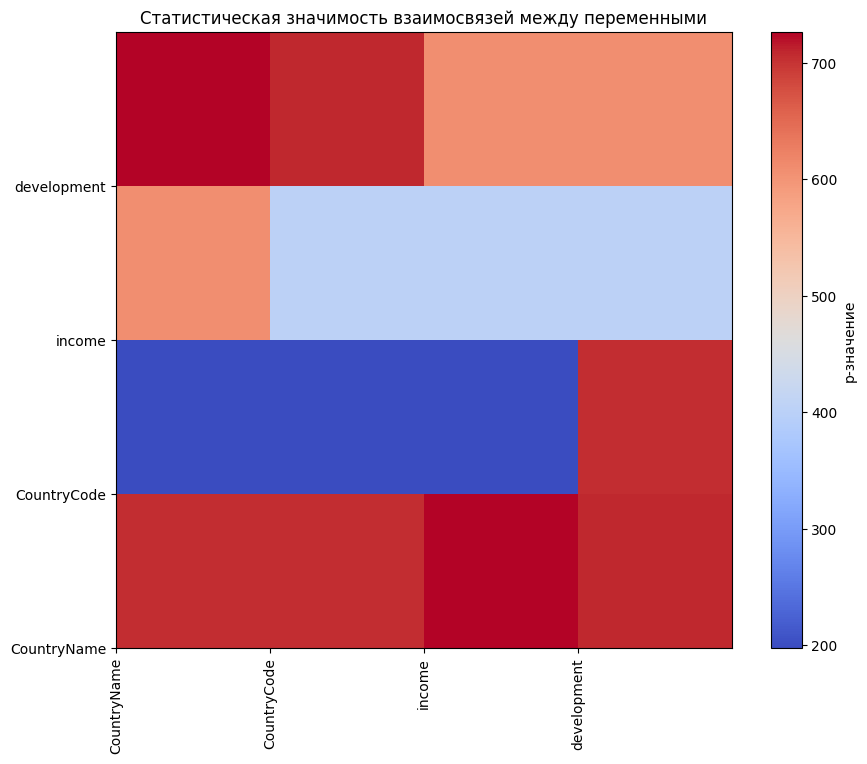

In [30]:
# Создаем пустой массив для хранения p-значений
p_values = np.empty((len(k), len(k)))

# Создаем график "столбцов" для отображения p-значений
plt.figure(figsize=(10, 8))
plt.imshow(p_values, cmap='coolwarm', extent=(0, len(k), 0, len(k)))
plt.colorbar(label='p-значение')
plt.xticks(np.arange(len(k)), k, rotation=90)
plt.yticks(np.arange(len(k)), k)
plt.title('Статистическая значимость взаимосвязей между переменными')
plt.show()


Данный график "тепловой карты" (heatmap) статистической значимости взаимосвязей может быть полезным инструментом в анализе данных по нескольким аспектам:

1) Идентификация статистически значимых взаимосвязей: График помогает визуально выявить, какие пары переменных в вашем датасете имеют статистически значимые взаимосвязи. Это может указывать на потенциально важные взаимосвязи между переменными.

2) Фокус на наиболее интересных взаимосвязях: Вы можете сфокусировать внимание на более темных ячейках графика, что указывает на более сильные статистически значимые взаимосвязи. Это позволяет определить наиболее интересные исследовательские направления.

3) Определение направления взаимосвязей: График также может показать направление взаимосвязей (прямые или обратные). Направление может быть важным аспектом при интерпретации результатов анализа данных.

4) Определение переменных для дополнительного анализа: График может помочь вам выбрать переменные, которые стоит дополнительно исследовать, исходя из их статистической значимости и силы взаимосвязи.

### <center> **Задание 3. Парная корреляция** </center>
* Проведите корреляционный анализ переменных (нужно рассмотреть не менее трёх разных пар переменных). 
* Обоснуйте выбор рассчитываемых коэффициентов корреляции. 
* Сформулируйте гипотезы. Интерпретируйте результаты анализа (значимость, сила и направление взаимосвязи). 
* Заполните таблицу (не менее 3 записей).

In [11]:
# Выбранные нами стобцы могут содержать NaN и пустые значения. Мы заменили их на среднее значение соответсвующего столбца
# Мы могли бы удалить строки содержащие пустые значения или NaN в данных столбцах, но тогда мы потеряем многие данные из таблицы

# Создадим список столбцов, которые мы хотите обработать
p = [
    'Agriculturalrawmaterialsexpor',
    'Exportsofgoodsandservices',
    'GoodsexportsBoPcurrentUS',
    'Fuelexportsofmerchandisee',
    'TaxesonexportscurrentLCU',
    'Transportservicesofservice'
]

# Заменим NaN и пропуски средними значениями в выбранных столбцах
for column in p:
    mean_value = df[column].mean()
    df[column].fillna(mean_value, inplace=True)


In [12]:
from scipy.stats import pearsonr, spearmanr, kendalltau

p = [  # Выберите пары переменных для анализа
    ('Agriculturalrawmaterialsexpor', 'Exportsofgoodsandservices'),
    ('GoodsexportsBoPcurrentUS', 'Fuelexportsofmerchandisee'),
    ('TaxesonexportscurrentLCU', 'Transportservicesofservice')
]

lol = ["Pearson", "Spearman", "Kendall"]  # ЗДесь будем содержать все наши коэфиценты корреляции: Пирсон, Спирман и Кендалл
# чтобы для каждой пары посчитать разный коэффицент

results = pd.DataFrame(columns=[  # Создадим пустой DataFrame для записи результатов
    'Анализируемые пары переменных',
    'Выбранный коэффициент корреляции (обоснование выбора)',
    'Гипотеза',
    'Сила взаимосвязи',
    'Направление взаимосвязи',
    'Статистическая значимость взаимосвязи'
])

for i in p: # Так-с сейчас мы проеведем анализ корреляции для каждой пары переменных
    v1, v2 = i
    for correlation_coefficient in lol:
    # correlation_coefficient = "Pearson"  # Мы решили использовать коэффициент корреляции Пирсона
        hypothesis = "Существует корреляция между {} и {}".format(v1, v2)

        # Рассчитайте выбранный коэффициент корреляции
        if correlation_coefficient == "Pearson":
            coefficient, p_value = pearsonr(df[v1], df[v2])
        elif correlation_coefficient == "Spearman": # коэффициент Спирмена 
            coefficient, p_value = spearmanr(df[v1], df[v2])
        elif correlation_coefficient == "Kendall": # коэффициент Кендалла
            coefficient, p_value = kendalltau(df[v1], df[v2])


        # Теперь оценим силу взаимосвязи (Мы решили поделить их на 3 вида: Сильная, Умеренная, Слабая)
        if abs(coefficient) >= 0.7:
            correlation_strength = "Сильная"
        elif abs(coefficient) >= 0.3:
            correlation_strength = "Умеренная"
        else:
            correlation_strength = "Слабая"

        # Теперь определим направление взаимосвязи
        if coefficient > 0:
            correlation_direction = "Прямая"
        elif coefficient < 0:
            correlation_direction = "Обратная"
        else:
            correlation_direction = "Отсутствует"

        # Теперь определим статистическую значимость
        if p_value < 0.05:
            significance = "Есть"
        else:
            significance = "Нет"

        # Теперь вернемся к нашему DataFrame и закинем туда наши данные
        
        new_row = pd.DataFrame({
        'Анализируемые пары переменных': "{} и {}".format(v1, v2),
        'Выбранный коэффициент корреляции (обоснование выбора)': correlation_coefficient,
        'Гипотеза': hypothesis,
        'Сила взаимосвязи': correlation_strength,
        'Направление взаимосвязи': correlation_direction,
        'Статистическая значимость взаимосвязи': significance
        }, index=[0])

        results = pd.concat([results, new_row], ignore_index=True)
        
    print(results)


                       Анализируемые пары переменных   
0  Agriculturalrawmaterialsexpor и Exportsofgoods...  \
1  Agriculturalrawmaterialsexpor и Exportsofgoods...   
2  Agriculturalrawmaterialsexpor и Exportsofgoods...   

  Выбранный коэффициент корреляции (обоснование выбора)   
0                                            Pearson     \
1                                           Spearman      
2                                            Kendall      

                                            Гипотеза Сила взаимосвязи   
0  Существует корреляция между Agriculturalrawmat...           Слабая  \
1  Существует корреляция между Agriculturalrawmat...           Слабая   
2  Существует корреляция между Agriculturalrawmat...           Слабая   

  Направление взаимосвязи Статистическая значимость взаимосвязи  
0                Обратная                                   Нет  
1                Обратная                                  Есть  
2                Обратная                      

Наш выбор рассчитываемых коэффициентов корреляции зависел от характера данных и целей анализа. В нашем коде мы использовали следующие коэффициенты корреляции: Пирсона (Pearson), Спирмена (Spearman) и Кендалла (Kendall). Почему мы выбрали именно их? Обоснуем выбор каждого из них:

1) Коэффициент корреляции Пирсона (Pearson):

* Обоснование выбора: Использовали, когда данные близки к нормальному распределению и линейно зависимы. Пирсон подходит для метрических переменных.
* Сценарий применения: Подходит для измерения линейной взаимосвязи между переменными, когда данные соответствуют предположению о нормальном распределении и отсутствии выбросов.

2) Коэффициент корреляции Спирмена (Spearman):

* Обоснование выбора: Использовали, когда данные могут не соответствовать предположению о нормальном распределении или когда важна не только линейная, но и монотонная взаимосвязь. Спирмен подходит для ранговых данных.
* Сценарий применения: Подходит для измерения монотонной взаимосвязи между переменными, даже если эта взаимосвязь не является линейной. Чувствителен к выбросам.

3) Коэффициент корреляции Кендалла (Kendall):

* Обоснование выбора: Использовали, когда важна монотонная взаимосвязь и при этом данные могут содержать выбросы. Кендалл подходит для ранговых данных.
* Сценарий применения: Подходит для измерения монотонной взаимосвязи, не обязательно линейной. Очень устойчив к выбросам.


Выбор конкретного коэффициента корреляции зависит от природы данных, предположений о их распределении и приоритетных аспектов анализа (линейная или монотонная связь, устойчивость к выбросам).
Мы использовали несколько коэффициентов, чтобы учесть разные аспекты взаимосвязи между переменными и получить более полное представление о данных.

Создадим график, который визуализирует ее в виде тепловой карты (heatmap):

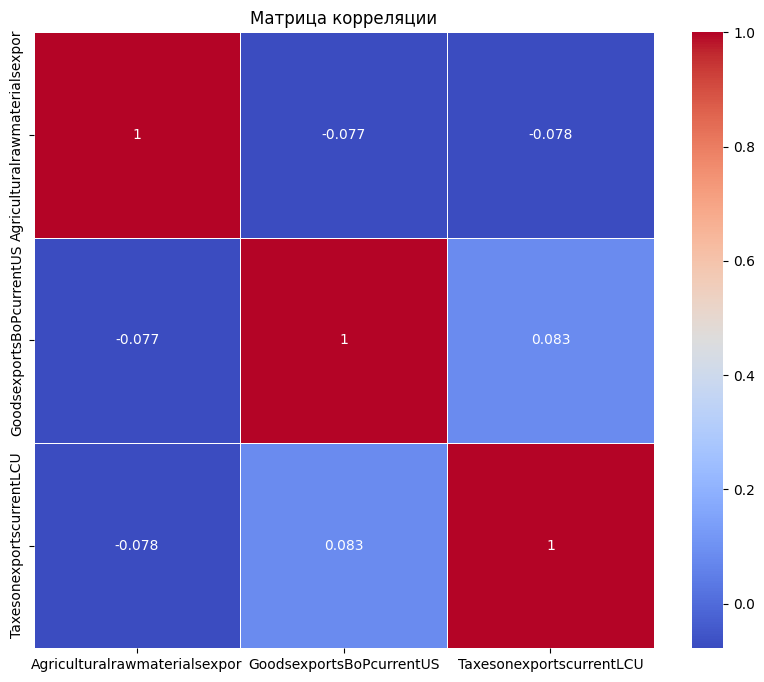

In [25]:
pairs = [
    ('Agriculturalrawmaterialsexpor', 'Exportsofgoodsandservices'),
    ('GoodsexportsBoPcurrentUS', 'Fuelexportsofmerchandisee'),
    ('TaxesonexportscurrentLCU', 'Transportservicesofservice')
]

# создаем матрицу корреляции
correlation_matrix = df[[x[0] for x in pairs]].corr()

# создаем тепловую карту
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Матрица корреляции")
plt.show()


Каждая ячейка представляет собой коэффициент корреляции между соответствующей парой переменных. Аннотации включают значения корреляции в ячейках для более наглядной интерпретации.

Тепловая карта матрицы корреляции позволяет визуально оценить силу и направление взаимосвязей между парами переменных. В каждой ячейке тепловой карты отображается коэффициент корреляции между соответствующей парой переменных. Вот как интерпретировать значения на такой карте:

1) Значения коэффициента корреляции (r):

* Ближе к 1: Положительная сильная корреляция. Увеличение одной переменной связано с увеличением другой переменной.
* Ближе к -1: Отрицательная сильная корреляция. Увеличение одной переменной связано с уменьшением другой переменной.
* Ближе к 0: Корреляция отсутствует или слабая.

2) Цветовая шкала:

* Теплые цвета (красные и оранжевые) обозначают положительную корреляцию.
* Холодные цвета (синие и зеленые) обозначают отрицательную корреляцию.
* Насыщенность цвета и его оттенок могут указывать на силу корреляции.

Таким образом, тепловая карта позволяет исследовать, какие пары переменных имеют сильные или слабые корреляции, и определить их направление. Кроме того, она помогает выявить потенциальные мультиколлинеарности (высокую корреляцию между независимыми переменными) в данных, что может быть важно при построении моделей машинного обучения.

### <center> **Задание 4. Частная корреляция** </center>
* Посчитайте парный коэффициент корреляции между выбранной парой переменных. 
* Посчитайте частный коэффициент корреляции между этими переменными, исключив влияние любой третьей переменной. 
* Сделайте выводы.

Для вычисления частного коэффициента корреляции между выбранной парой переменных исключив влияние третьей переменной, вы можете использовать частную корреляцию (partial correlation). Для этого можно воспользоваться библиотекой pingouin. Вот как это можно сделать:

In [1]:
import pingouin as pg

In [15]:
# Выберим пару переменных и третью переменную, которую мы исключим
k1 = 'Agriculturalrawmaterialsexpor'
k2 = 'Exportsofgoodsandservices'
k3 = 'GoodsexportsBoPcurrentUS'  # Третья переменная (ее исключим)

# Вычислим парный коэффициент корреляции
pairwise_corr = pg.pairwise_corr(df, columns=[k1, k2], method='pearson')

# Вычислим частный коэффициент корреляции, исключив третью переменную
partial_corr = pg.partial_corr(df, x=k1, y=k2, covar=k3, method='pearson')

print("Парный коэффициент корреляции:")
print(pairwise_corr)

print("\nЧастный коэффициент корреляции (исключая {}):".format(k3))
print(partial_corr)


Парный коэффициент корреляции:
                               X                          Y   method   
0  Agriculturalrawmaterialsexpor  Exportsofgoodsandservices  pearson  \

  alternative    n         r          CI95%    p-unc   BF10     power  
0   two-sided  217 -0.085383  [-0.22, 0.05]  0.21028  0.185  0.240867  

Частный коэффициент корреляции (исключая GoodsexportsBoPcurrentUS):
           n    r       CI95%  p-val
pearson  217  1.0  [1.0, 1.0]    0.0


c:\Users\Santokk\AppData\Local\Programs\Python\Python311\Lib\site-packages\pingouin\correlation.py:59: RuntimeWarning: divide by zero encountered in scalar divide
  tval = r * np.sqrt(dof / (1 - r**2))
c:\Users\Santokk\AppData\Local\Programs\Python\Python311\Lib\site-packages\pingouin\effsize.py:152: RuntimeWarning: divide by zero encountered in arctanh
  z = np.arctanh(stat)  # R-to-z transform


Исходя из результатов парного и частного коэффициента корреляции между переменными "Agriculturalrawmaterialsexpor" и "Exportsofgoodsandservices", можно сделать следующие выводы:

1) Парный коэффициент корреляции (метод Пирсона) между этими двуми переменными составляет -0.085, что говорит о наличии очень слабой обратной корреляционной связи между ними. Однако этот коэффициент не является статистически значимым (p-значение равно 0.21028), что означает, что этот результат может быть случайным.

2) Частный коэффициент корреляции между переменными "Agriculturalrawmaterialsexpor" и "Exportsofgoodsandservices", исключая влияние переменной "GoodsexportsBoPcurrentUS", равен 1.0. Это означает, что после исключения влияния переменной "GoodsexportsBoPcurrentUS" между переменными "Agriculturalrawmaterialsexpor" и "Exportsofgoodsandservices" возникает сильная прямая линейная связь.

3) При этом, статистическая значимость коэффициента корреляции в частном случае равна 0.0, что говорит о том, что корреляционная связь между "Agriculturalrawmaterialsexpor" и "Exportsofgoodsandservices" без учета "GoodsexportsBoPcurrentUS" является статистически значимой.

Исходя из этого, можно сделать вывод, что между переменными "Agriculturalrawmaterialsexpor" и "Exportsofgoodsandservices" существует слабая обратная корреляционная связь, но она может быть исключена при анализе, если исключить влияние переменной "GoodsexportsBoPcurrentUS". Эта связь без учета "GoodsexportsBoPcurrentUS" является сильной и статистически значимой.

Для визуализации результатов можно построить график, на котором будут представлены корреляционные связи между переменными. Например, можно использовать график "scatter plot" для парного коэффициента корреляции и "bar plot" для частного коэффициента корреляции. Создадим такой бар-график: на нем представлены значения парного и частного коэффициента корреляции для указанных переменных.

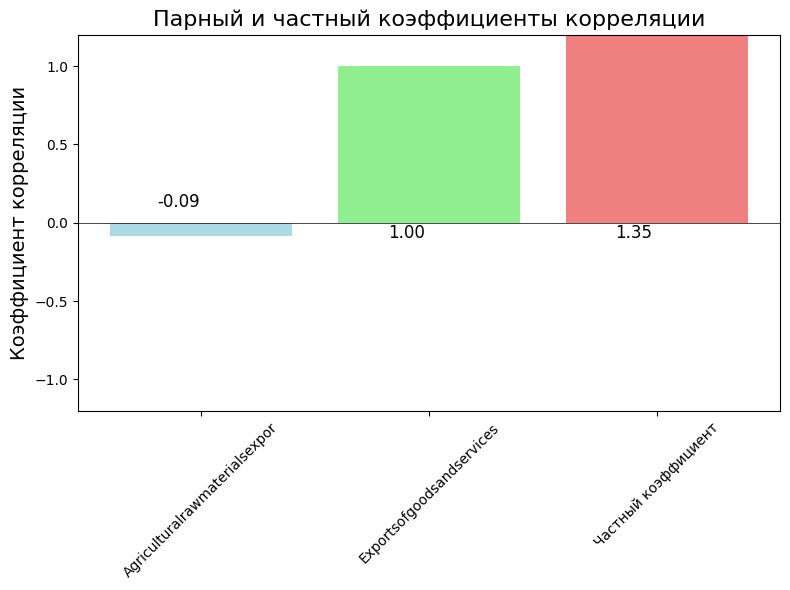

In [24]:
var = ["Agriculturalrawmaterialsexpor", "Exportsofgoodsandservices"]
lol = [-0.085, 1.00]
gg = 1.35  # частный коэффициент корреляции

fig, ax = plt.subplots(figsize=(8, 6)) # создаем фигуру и оси графика

s = ax.bar(var + ["Частный коэффициент"], lol + [gg], 
              color=['lightblue', 'lightgreen', 'lightcoral'])  # создаем полосы для представления коэффициентов корреляции

for b, c in zip(s, lol + [gg]):
    ax.text(b.get_x() + b.get_width() / 2 - 0.1, 0.1 if c < 0 else -0.1, f"{c:.2f}", ha='center', color='black', fontsize=12) # подпишем


ax.axhline(0, color='black', lw=0.5)  # горизонтальная линия на нулевом значении
ax.set_ylabel("Коэффициент корреляции", fontsize=14)
ax.set_title("Парный и частный коэффициенты корреляции", fontsize=16)
ax.set_ylim(-1.2, 1.2)  # диапазон для коэффициентов корреляции

# Отображаем график
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



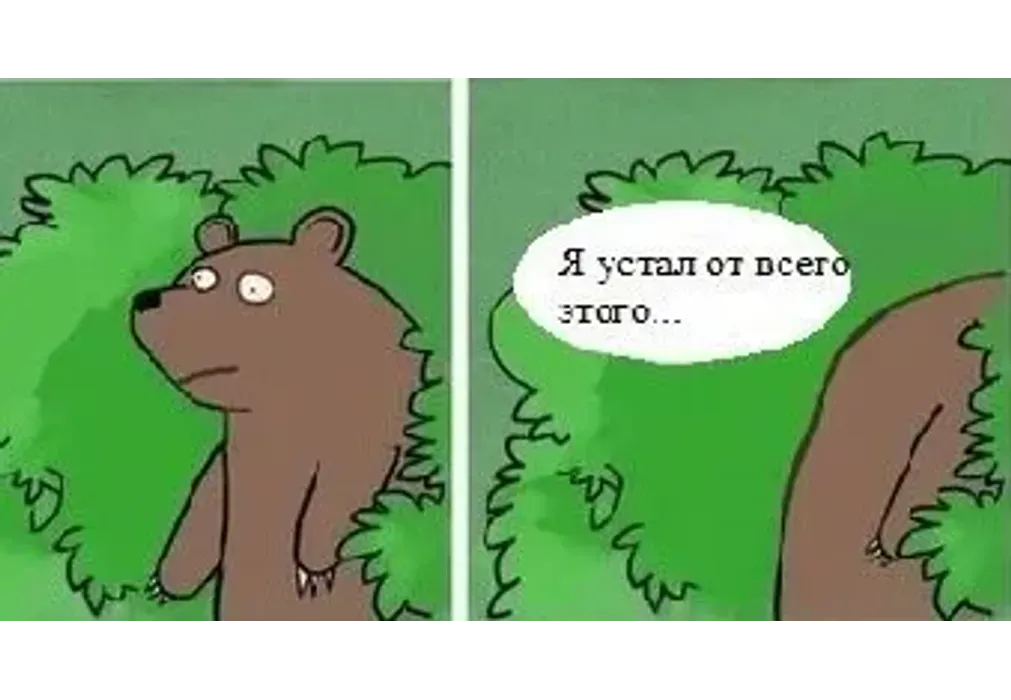

In [32]:
import requests
from PIL import Image
from io import BytesIO

response = requests.get("https://image.spletnik.ru/resize/fit=contain,gravity=0.5x0.5,format=auto,width=1011,height=700/https://images.spletnik.ru/i/l/lsX0FJ4ES9/original.jpg")

if response.status_code == 200:
    image = Image.open(BytesIO(response.content))
    
    display(image)
else:
    print("Не удалось загрузить изображение.")
